<img src="https://github.com/seap-udea/xearch/blob/main/resources/xearch-logo.png?raw=true" align="left">

## Required packages

In [1]:
# External modules
import spiceypy as spy
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c
from astropy.time import Time
import pandas as pd
import pickle
from datetime import datetime
from tqdm import tqdm
from IPython.display import display,HTML

# Constants
G = c.G.value
Msun = c.M_sun.value
Mearth = c.M_earth.value
Mjup = c.M_jup.value
Rsun = c.R_sun.value
Rearth = c.R_earth.value
Rjup = c.R_jup.value
Mjup2earth = Mjup/Mearth
Rjup2earth = Rjup/Rearth

# Units
K = 1 # Kelvin
days = 86400
JD = days # Julian days
BJD = days # Bessel Julian days
years = 365.25*days # Julian years
au = c.au.value 
deg = np.pi/180
rad = 1/deg
Gyr = 1e9*years
dex = 1

# Useful routines
def sex2dec(angle):
    h, m, s = map(float, angle.split())
    sgn = np.sign(h)
    return sgn*(abs(h) + m/60 + s/3600)

def date2jd(date, format='%y/%m/%d'):
    dt = datetime.strptime(date, format)
    t = Time(dt)
    jd = t.jd
    return jd

def print_df(df):
    display(HTML(df.to_html()))

def filter(dataframe, conditions=[], dropna=None, show=0):
    cond = pd.Series([True]*len(dataframe))
    for condition in conditions:
        column = condition[0]
        value = condition[1]
        if isinstance(value,list):
            cond = (dataframe[column]>=value[0])&(dataframe[column]<=value[1])&cond
        else:
            cond_local = (dataframe[column] == value)
            if isinstance(value,str):
                cond_cont = (dataframe[column].str.contains(value))
                cond_local = cond_local|cond_cont
            cond = cond_local&cond
    
    data = dataframe[cond]
    if dropna is not None:
        data = data.dropna(subset=dropna)

    if show>0:
        print_df(data.head(show))

    return cond,data

class System(object):
    pass

def picklethis(data, filepath):
    if data is not None:
        with open(filepath, 'wb') as file:
            pickle.dump(data, file)

def unpickle(filepath):
    with open(filepath, 'rb') as file:
        data = pickle.load(file)
    return data

## Read data

In [2]:
code_name = '51_Peg_b'
system = unpickle(f"signals/rv/{code_name}.pkl")

(0.0, 21.111692000000005)

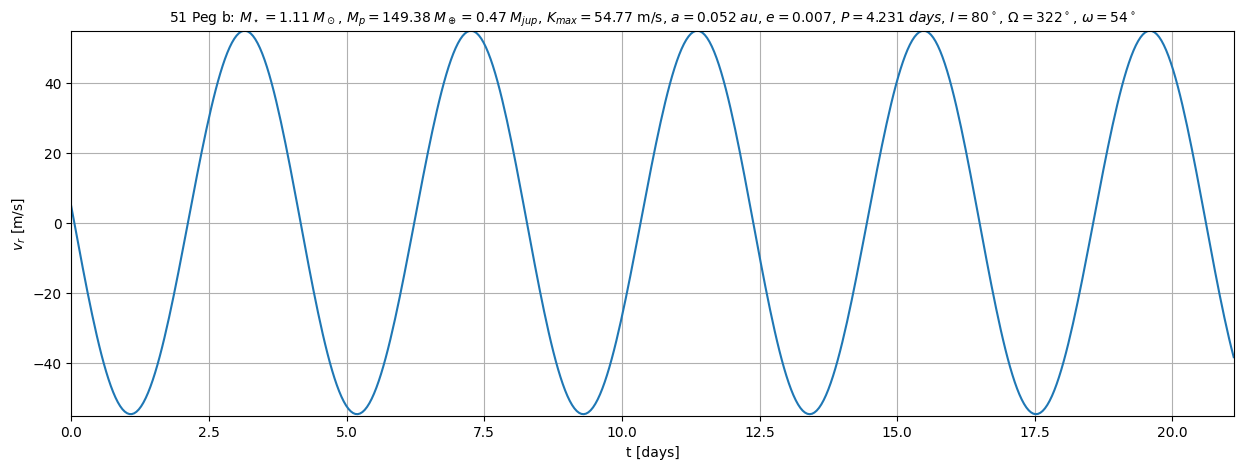

In [3]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(system.tobs*system.UT/days,system.vrads*system.UV)
ax.grid()
ax.set_ylabel(r'$v_r$ [m/s]')
ax.set_xlabel('t [days]')
ax.set_title(
f"{system.data.planet_name}: \
$M_\star = {system.data.star_mass:.2f}\;M_\odot$, \
$M_p = {system.data.mass:.2f}\;M_\oplus = {system.data.mass/Mjup2earth:.2f}\;M_{{jup}}$, $K_{{max}} = {system.Kmax*system.UV:.2f}$ m/s, \
$a = {system.data.a:.3f}\;au$, \
$e = {system.data.e:.3f}$, \
$P = {system.data.period:.3f}\;days$, \
$I = {system.I*rad:.0f}^\circ$, $\Omega = {system.W*rad:.0f}^\circ$, $\omega = {system.w*rad:.0f}^\circ$",
fontsize=10
)
Krange = max(abs(system.vrads).max(),abs(system.vrads).min())*system.UV
ax.set_ylim(-Krange,Krange)
ax.set_xlim(0,system.tobs.max()*system.UT/days)